<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Загрузка,-изучение-и-исследовательский-анализ-данных" data-toc-modified-id="Загрузка,-изучение-и-исследовательский-анализ-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Загрузка, изучение и исследовательский анализ данных</a></span><ul class="toc-item"><li><span><a href="#Загрузка-и-изучение-файла-с-данными" data-toc-modified-id="Загрузка-и-изучение-файла-с-данными-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Загрузка и изучение файла с данными</a></span></li><li><span><a href="#Исследовательский-анализ-данных" data-toc-modified-id="Исследовательский-анализ-данных-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Исследовательский анализ данных</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Разбиение-данных-на-выборки" data-toc-modified-id="Разбиение-данных-на-выборки-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Разбиение данных на выборки</a></span></li><li><span><a href="#Исследование-моделей" data-toc-modified-id="Исследование-моделей-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Исследование моделей</a></span><ul class="toc-item"><li><span><a href="#Decision-Tree-Classifier" data-toc-modified-id="Decision-Tree-Classifier-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Decision Tree Classifier</a></span></li><li><span><a href="#Random-Forest-Classifier" data-toc-modified-id="Random-Forest-Classifier-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Random Forest Classifier</a></span></li><li><span><a href="#Logistic-Regression" data-toc-modified-id="Logistic-Regression-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Logistic Regression</a></span></li><li><span><a href="#kNN-Classifier" data-toc-modified-id="kNN-Classifier-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>kNN Classifier</a></span></li></ul></li><li><span><a href="#Выбор-финальной-модели" data-toc-modified-id="Выбор-финальной-модели-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Выбор финальной модели</a></span><ul class="toc-item"><li><span><a href="#Выбор-финальной-модели-на-основе-выбранной-метрики" data-toc-modified-id="Выбор-финальной-модели-на-основе-выбранной-метрики-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Выбор финальной модели на основе выбранной метрики</a></span></li><li><span><a href="#Проверка-финальной-модели-на-адекватность" data-toc-modified-id="Проверка-финальной-модели-на-адекватность-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Проверка финальной модели на адекватность</a></span></li></ul></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Вывод</a></span></li></ul></div>

# Рекомендация тарифов

Даны данные о поведении клиентов двух новых тарифов оператора мобильной связи - тарифы Ультра и Смарт. Компания выяснила, что многие клиенты пользуются архивными тарифами.

**Цель**: нужно построить модель, способную проанализировать поведение клиентов и предложить пользователям новый тариф.

**Целевой признак модели**: тариф пользователя (признак is_ultra).

*Примечание от заказчика:* качество модели по *accuracy* должно быть не менее **0.75**.

# Описание данных

 - сalls — количество звонков
 - minutes — суммарная длительность звонков в минутах
 - messages — количество sms-сообщений
 - mb_used — израсходованный интернет-трафик в Мб
 - is_ultra — каким тарифом пользовался в течение месяца («Ультра» — 1, «Смарт» — 0)

## Загрузка, изучение и исследовательский анализ данных

### Загрузка и изучение файла с данными

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

# import classifiers
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

# import other tools
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.dummy import DummyClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

users = pd.read_csv('/datasets/users_behavior.csv')
users.head(10)

,calls,minutes,messages,mb_used,is_ultra
0,40.0,311.90,83.0,19915.42,0
1,85.0,516.75,56.0,22696.96,0
2,77.0,467.66,86.0,21060.45,0
3,106.0,745.53,81.0,8437.39,1
4,66.0,418.74,1.0,14502.75,0
5,58.0,344.56,21.0,15823.37,0
6,57.0,431.64,20.0,3738.90,1
7,15.0,132.40,6.0,21911.60,0
8,7.0,43.39,3.0,2538.67,1
9,90.0,665.41,38.0,17358.61,0


In [2]:
users.is_ultra.value_counts(normalize=True)

0    0.693528
1    0.306472
Name: is_ultra, dtype: float64

In [3]:
display(users.info())
display(users.describe())
users.duplicated().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3214 entries, 0 to 3213
Data columns (total 5 columns):
calls       3214 non-null float64
minutes     3214 non-null float64
messages    3214 non-null float64
mb_used     3214 non-null float64
is_ultra    3214 non-null int64
dtypes: float64(4), int64(1)
memory usage: 125.7 KB


None

,calls,minutes,messages,mb_used,is_ultra
count,3214.000000,3214.000000,3214.000000,3214.000000,3214.000000
mean,63.038892,438.208787,38.281269,17207.673836,0.306472
std,33.236368,234.569872,36.148326,7570.968246,0.461100
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,40.000000,274.575000,9.000000,12491.902500,0.000000
50%,62.000000,430.600000,30.000000,16943.235000,0.000000
75%,82.000000,571.927500,57.000000,21424.700000,1.000000
max,244.000000,1632.060000,224.000000,49745.730000,1.000000


0

 - Проблем с пропусками, дубликатами и типами данных не обнаружено
 - Стоит обратить внимание, что в целевом признаке (тарифы) соотношение бинарных классов 70% (Смарт) на 30% (Ультра)

### Исследовательский анализ данных

- Посмотрим, как признаки коррелируют друг с другом

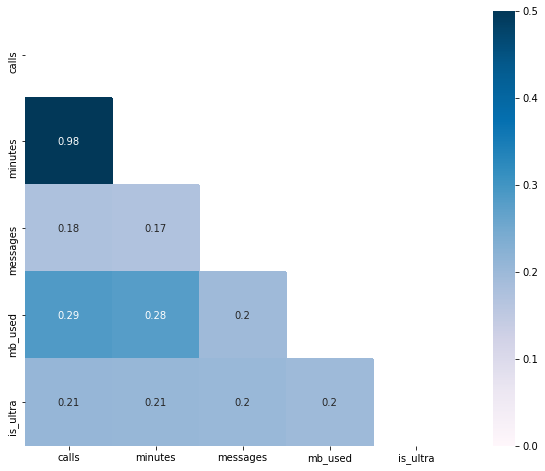

In [4]:
mask = np.triu(users.corr())
fig = plt.subplots(figsize=(12, 8))
sns.heatmap(users.corr(), 
            annot=True, 
            cmap= 'PuBu', 
            square=True, 
            mask=mask, 
            vmin=0, 
            vmax=0.5
           )
plt.show()

- Судя по всему, линейную зависимость мы наблюдаем только между количеством звонков и минут, потраченных во время звонков, что вполне логично и очевидно, ведь, как правило, чем чаще мы звоним, тем дольше суммарное время разговоров;
- Посмотрим матрицу диаграмм рассеяния для разных тарифов, чтобы поподробнее взглянуть на зависимости в данных и оценить возможные нелинейные зависимости

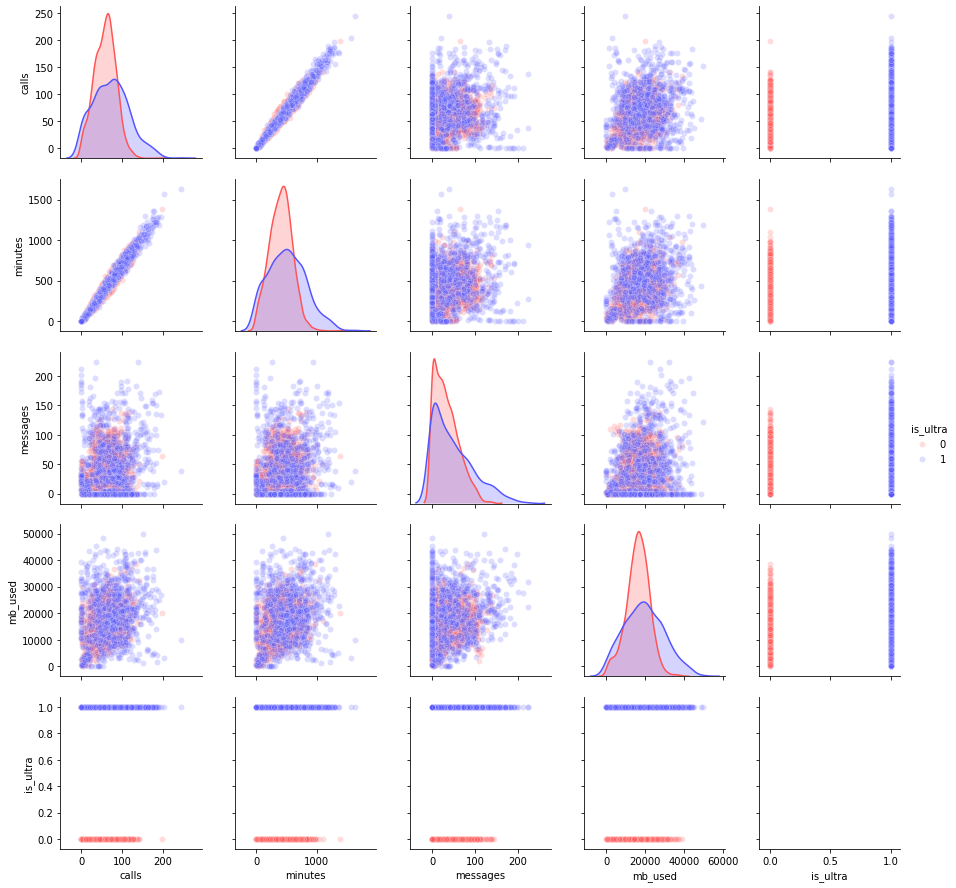

In [5]:
sns.pairplot(users, 
             hue='is_ultra', 
             plot_kws={'alpha': .2},
             palette='seismic_r'
            )
plt.show()

- Очевидных зависимостей, кроме той, что мы уже отметили - calls vs minutes - не наблюдается
- В целом данные разных тарифов перекрывают друг друга
- Также отмечается гораздо бОльшая дисперсия в признаках для тарифа Ультра

- Рассмотрим данные на столбчатых диаграммах с разделением по тарифам

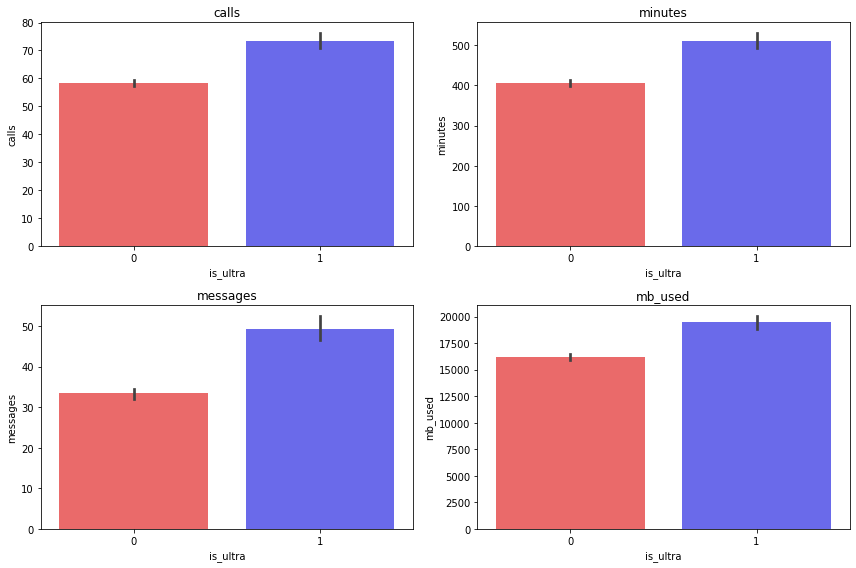

In [6]:
fig, axs = plt.subplots(2, 
                        2, 
                        figsize=(12, 8)
                       )

i, j = 0, 0

for column in ['calls', 'minutes', 'messages', 'mb_used']:
    sns.barplot(x='is_ultra', 
                y=column, 
                data=users, 
                ax=axs[i, j],
                palette='seismic_r'
               )
    axs[i, j].set_title(column)
    j+=1
    if j==2:
        j=0
        i+=1

plt.tight_layout()
plt.show()

- В целом пользователи тарифа Ультра тратят больше данных мобильной связи, что, впрочем, довольно логично, ведь тариф Ультра предлагает бОльшие объемы трафика

### Вывод

- Проблем с пропусками, дубликатами и типами данных не обнаружено
- Есть очень сильная прямая линейная зависимость между количеством звонков и используемыми минутами по обоим тарифам
- Для остальных признаков очевидные корреляцонные зависимости не наблюдаются
- Дисперсия признаков тарифа Ультра выше, чем у тарифа Смарт
- Пользователи тарифа Ультра используют бОльший объем предоставленных данных мобильной связи

## Разбиение данных на выборки

- Нужно предсказать признак is_ultra, который показывает тариф, которым пользуется клиент (0 - Смарт, 1 - Ультра), поэтому **is_ultra - целевой признак**

- Для настройки гиперпараметров будем использовать GridSearchCV
- Поэтому мы делим данные на две выборки: обучающая и тестовая. Обучающая в свою очередь при выполнении GridSearchCV, а конкретно при выполнении кросс-валидации, будет делиться снова на обучающую и валидационную выборки для каждого набора из k. В нашем случае значением k выбрано 10, так как по работе моделей в трех кейсах (k=5, k=7 и k=10, дальше 10 не разбивалось, т.к. иначе получаются довольно маленькие по объему выборки) k=10 показал наилучший результат по качеству моделей.
- В таком случае, разделим данные так, что 25% - тестовая выборка;
- Мы уже отмечали, что соотношение классов в целевом признаке 70% на 30%, поэтому при разбиении данных на обучающую и тестовую выборки применим стратификацию

In [7]:
seed = 24
cv_k = 10

x = users.drop(columns=['is_ultra']) # датафрейм с признаками
y = users.loc[:, 'is_ultra'] # серия с целевым признаком

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, 
                                                    random_state=seed, 
                                                    stratify=y
                                                   )

## Исследование моделей

- Целевой признак имеет 2 класса, поэтому попробуем 4 разных модели, подходящие для задачи бинарной классификации: 
    - *DecisionTreeClassifier* 
    - *RandomForestClassifier*
    - *LogisticRegression*
    - *KNeighborsClassifier*
- Метрика для оценки качества модели - *accuracy*

- Для для каждой модели мы сделаем следующее:
    1. Зададим диапазоны гиперпараметров
    2. Создадим объект класса модели и поместим его в объект GridSearchCV, задав объект модели, диапазоны гиперпараметров, и указав количество разбиений данных для кросс-валидации
    3. Обучаем объект GridSearchCV: для каждой комбинации гиперпараметров из предоставленных диапазонов делается кросс-валидация, производится оценка моделей каждой комбинации, выбирается комбинация, показавшая наилучшую оценку
    4. Сохраняем гиперпараметры и seed лучшей модели
    5. Сравниваем accuracy по валидационной выборке и по тестовой

### Decision Tree Classifier

In [8]:
hyperparams_dt = {'max_depth': np.arange(1, 11),
                  'min_samples_leaf': np.arange(1, 11),
                  'max_features': np.arange(1, len(x.columns)),
                  'criterion': ['gini', 'entropy']
                 }

dt = DecisionTreeClassifier(random_state=seed)
dt_gscv = GridSearchCV(dt, hyperparams_dt, cv=cv_k)
dt_gscv.fit(x_train, y_train)

dt_gscv_best_params = dt_gscv.best_params_
dt_gscv_best_model = dt_gscv.best_estimator_
dt_gscv_validation_score = dt_gscv.best_score_
dt_gscv_test_score = dt_gscv_best_model.score(x_test, y_test)

print(f'Выбранные гиперпараметры: {dt_gscv_best_params}')
print(f'Accuracy на валидационной выборке: {round(dt_gscv_validation_score, 3)}')
print(f'Accuracy на тестовой выборке: {round(dt_gscv_test_score, 3)}')

Выбранные гиперпараметры: {'criterion': 'entropy', 'max_depth': 8, 'max_features': 2, 'min_samples_leaf': 9}
Accuracy на валидационной выборке: 0.808
Accuracy на тестовой выборке: 0.797


- Количественные гиперпараметры выбранной модели не являются крайними членами выбранных для GridSearchCV диапазонов, поэтому диапазоны можно не менять
- **Accuracy** по валидационной и тестовой выборкам **больше 0.75** и составляет **0.797 по тестовой выборке**

### Random Forest Classifier

In [9]:
hyperparams_rf = {'max_depth': np.arange(1, 11),
                  'n_estimators': np.arange(10, 51, 10),
                  'criterion': ['gini', 'entropy']
                 }

rf = RandomForestClassifier(random_state=seed)
rf_gscv = GridSearchCV(rf, hyperparams_rf, cv=cv_k)
rf_gscv.fit(x_train, y_train)

rf_gscv_best_params = rf_gscv.best_params_
rf_gscv_best_model = rf_gscv.best_estimator_
rf_gscv_validation_score = rf_gscv.best_score_
rf_gscv_test_score = rf_gscv_best_model.score(x_test, y_test)

print(f'Выбранные гиперпараметры: {rf_gscv_best_params}')
print(f'Accuracy на валидационной выборке: {round(rf_gscv_validation_score, 3)}')
print(f'Accuracy на тестовой выборке: {round(rf_gscv_test_score, 3)}')

Выбранные гиперпараметры: {'criterion': 'gini', 'max_depth': 9, 'n_estimators': 40}
Accuracy на валидационной выборке: 0.813
Accuracy на тестовой выборке: 0.803


- Количественные гиперпараметры выбранной модели не являются крайними членами выбранных для GridSearchCV диапазонов, поэтому диапазоны можно не менять
- **Accuracy** по валидационной и тестовой выборкам **больше 0.75** и составляет **0.803 по тестовой выборке**, а также больше, чем у модели решающего дерева

### Logistic Regression

In [10]:
hyperparams_logreg = {'C': np.logspace(-5, 10, 20),
                      'penalty': ['l1', 'l2']
                     }

logreg = LogisticRegression(random_state=seed)
logreg_gscv = GridSearchCV(logreg, hyperparams_logreg, cv=cv_k)
logreg_gscv.fit(x_train, y_train)

logreg_gscv_best_params = logreg_gscv.best_params_
logreg_gscv_best_model = logreg_gscv.best_estimator_
logreg_gscv_validation_score = logreg_gscv.best_score_
logreg_gscv_test_score = logreg_gscv_best_model.score(x_test, y_test)

print(f'Выбранные гиперпараметры: {logreg_gscv_best_params}')
print(f'Accuracy на валидационной выборке: {round(logreg_gscv_validation_score, 3)}')
print(f'Accuracy на тестовой выборке: {round(logreg_gscv_test_score, 3)}')

Выбранные гиперпараметры: {'C': 3.359818286283781, 'penalty': 'l1'}
Accuracy на валидационной выборке: 0.753
Accuracy на тестовой выборке: 0.738


- Попробуем сделать стандартизацию признаков для улучшения качества модели;

In [11]:
hyperparams_logreg_scaled = {'logreg__C': np.logspace(-5, 10, 20),
                             'logreg__penalty': ['l1', 'l2']
                             }

scaler_logreg = StandardScaler()
logreg_scaled = LogisticRegression(random_state=seed)

steps_logreg_scaled = [('scaler', scaler_logreg), ('logreg', logreg_scaled)]
pipeline_logreg_scaled = Pipeline(steps_logreg_scaled)

logreg_gscv_scaled = GridSearchCV(pipeline_logreg_scaled, hyperparams_logreg_scaled, cv=cv_k)
logreg_gscv_scaled.fit(x_train, y_train)

logreg_gscv_best_params_scaled = logreg_gscv_scaled.best_params_
logreg_gscv_best_model_scaled = logreg_gscv_scaled.best_estimator_
logreg_gscv_validation_score_scaled = logreg_gscv_scaled.best_score_
logreg_gscv_test_score_scaled = logreg_gscv_best_model_scaled.score(x_test, y_test)

print(f'Выбранные гиперпараметры: {logreg_gscv_best_params_scaled}')
print(f'Accuracy на валидационной выборке: {round(logreg_gscv_validation_score_scaled, 3)}')
print(f'Accuracy на тестовой выборке: {round(logreg_gscv_test_score_scaled, 3)}')

Выбранные гиперпараметры: {'logreg__C': 0.5455594781168515, 'logreg__penalty': 'l2'}
Accuracy на валидационной выборке: 0.753
Accuracy на тестовой выборке: 0.743


- Количественные гиперпараметры выбранной модели не являются крайними членами выбранных для GridSearchCV диапазонов, поэтому диапазоны можно не менять
- **Accuracy** по валидационной слегка выше 0.75, но по **тестовой равна 0.743** с применением стандартизации (без нее по тестовой 0.738), что ниже заданного условия 0.75 и ниже, чем у остальных моделей

### kNN Classifier

In [12]:
hyperparams_knn = {'n_neighbors': np.arange(1, 50)}

knn = KNeighborsClassifier()
knn_gscv = GridSearchCV(knn, hyperparams_knn, cv=cv_k)
knn_gscv.fit(x_train, y_train)

knn_gscv_best_params = knn_gscv.best_params_
knn_gscv_best_model = knn_gscv.best_estimator_
knn_gscv_validation_score = knn_gscv.best_score_
knn_gscv_test_score = knn_gscv_best_model.score(x_test, y_test)

print(f'Выбранные гиперпараметры: {knn_gscv_best_params}')
print(f'Accuracy на валидационной выборке: {round(knn_gscv_validation_score, 3)}')
print(f'Accuracy на тестовой выборке: {round(knn_gscv_test_score, 3)}')

Выбранные гиперпараметры: {'n_neighbors': 7}
Accuracy на валидационной выборке: 0.764
Accuracy на тестовой выборке: 0.759


- Значение по тестовой выборке выше 0.75, тем не менее, попробуем сделать стандартизацию признаков для улучшения качества модели;

In [13]:
hyperparams_knn_scaled = {'knn__n_neighbors': np.arange(1, 50)}

scaler_knn = StandardScaler()
knn_scaled = KNeighborsClassifier()

steps_knn_scaled = [('scaler', scaler_knn), ('knn', knn_scaled)]
pipeline_knn_scaled = Pipeline(steps_knn_scaled)

knn_gscv_scaled = GridSearchCV(pipeline_knn_scaled, hyperparams_knn_scaled, cv=cv_k)
knn_gscv_scaled.fit(x_train, y_train)

knn_gscv_best_params_scaled = knn_gscv_scaled.best_params_
knn_gscv_best_model_scaled = knn_gscv_scaled.best_estimator_
knn_gscv_validation_score_scaled = knn_gscv_scaled.best_score_
knn_gscv_test_score_scaled = knn_gscv_best_model_scaled.score(x_test, y_test)

print(f'Выбранные гиперпараметры: {knn_gscv_best_params_scaled}')
print(f'Accuracy на валидационной выборке: {round(knn_gscv_validation_score_scaled, 3)}')
print(f'Accuracy на тестовой выборке: {round(knn_gscv_test_score_scaled, 3)}')

Выбранные гиперпараметры: {'knn__n_neighbors': 17}
Accuracy на валидационной выборке: 0.807
Accuracy на тестовой выборке: 0.787


- С помощью стандартизации удалось увеличить качество модели по тестовой выборке на 2.8 %
- Количественные гиперпараметры выбранной модели не являются крайними членами выбранных для GridSearchCV диапазонов, поэтому диапазоны можно не менять
- **Accuracy** по валидационной и тестовой выборкам **больше 0.75** и составляет **0.787 по тестовой выборке** с использованием стандартизации (без нее по тестовой 0.765), что все равно ниже, чем у модели случайного леса

## Выбор финальной модели

### Выбор финальной модели на основе выбранной метрики

In [14]:
models_results = pd.DataFrame({'Validation score': [dt_gscv_validation_score,
                                                    rf_gscv_validation_score,
                                                    logreg_gscv_validation_score,
                                                    logreg_gscv_validation_score_scaled,
                                                    knn_gscv_validation_score,
                                                    knn_gscv_validation_score_scaled
                                                   ],
                               'Test score': [dt_gscv_test_score, 
                                              rf_gscv_test_score,
                                              logreg_gscv_test_score,
                                              logreg_gscv_test_score_scaled,
                                              knn_gscv_test_score,
                                              knn_gscv_test_score_scaled
                                             ]
                              }, index=['Decision Tree', 
                                        'Random Forest', 
                                        'Logistic Regression', 
                                        'Logistic Regression scaled', 
                                        'kNN', 
                                        'kNN scaled'
                                       ]
                             )

models_results.sort_values(by='Test score', ascending=False)

,Validation score,Test score
Random Forest,0.813278,0.803483
Decision Tree,0.807884,0.797264
kNN scaled,0.806639,0.787313
kNN,0.764315,0.758706
Logistic Regression scaled,0.753112,0.742537
Logistic Regression,0.752697,0.737562


- Согласно accuracy по тестовой выборке, лучший результат показала модель Random Forest со значением **accuracy 0.80** и следующими гиперпараметрами:
    1. criterion = gini
    2. max_depth = 9
    3. n_estimators = 40
    
- Данная модель выбрана как финальная на основе лучших результатов работы с тестовой выборкой

### Проверка финальной модели на адекватность

 - Проверим выбранную модель на адекватность сравнением с константной моделью. Т.к. оценка точности модели производилась метрикой accuracy, сравним точность финальной модели с точностью константной модели по преобладающему классу.

In [15]:
dummy_model = DummyClassifier(strategy="most_frequent")

dummy_model.fit(x_train, y_train)
dummy_model_score = dummy_model.score(x_test, y_test)

if dummy_model_score < rf_gscv_test_score:
    print(f'Модель работает адекватно: model accuracy {round(rf_gscv_test_score, 3)} > dummy accuracy {round(dummy_model_score, 2)}')
else:
    print(f'Модель работает неадекватно: dummy accuracy {round(dummy_model_score, 2)} >= model accuracy {round(rf_gscv_test_score, 3)}')

Модель работает адекватно: model accuracy 0.803 > dummy accuracy 0.69


- Accuracy финальной модели значительно превышает accuracy константной модели по преобладающему классу
- Выбранная модель прошла проверку на адекватность

## Вывод

1. На имеющихся данных протестированы 4 разных модели, подходящие для задачи бинарной классификации:
    - DecisionTreeClassifier
    - RandomForestClassifier
    - LogisticRegression
    - KNeighborsClassifier
2. Настройка гиперпараметров была сделана с использование GridSearchCV
3. Для каждой из модели был выбран вариант с гиперпараметрами, показавший лучший результат на валидационной выборке
4. Каждая из лучших моделей была проверена на тестовой выборке, отложенной еще до обучения. Модель, показавшая лучший результат на тестовой выборке выбрана как финальная - **RandomForestClassifier, accuracy по тестовой выборке = 0.8**
5. Модель проверена на адекватность с использованием константной модели по преобладающему классу